## Clustering

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

 Импортируем наш датасет "drivers.csv":

In [13]:
df = pd.read_csv("drivers.csv") 
df.head()

,Driver_ID\tDistance_Feature\tSpeeding_Feature
0,3423311935\t71.24\t28.0
1,3423313212\t52.53\t25.0
2,3423313724\t64.54\t27.0
3,3423311373\t55.69\t22.0
4,3423310999\t54.58\t25.0


Используем "delimiter", чтобы правильно разделить данные:

In [14]:
df = pd.read_csv("drivers.csv", delimiter = "\t") ## delimiter - разделяет 
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


Визуализируем данные:

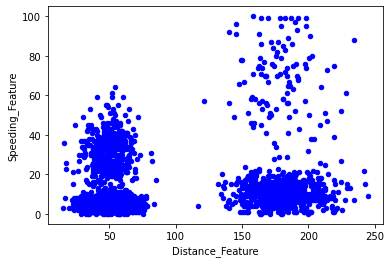

In [15]:
df.plot.scatter(x = "Distance_Feature", y = "Speeding_Feature", c = "blue")

#### Использование K-means:

Создадим модель с помощью K-means и обучим ее:

In [19]:
kmeans = KMeans(n_clusters = 2).fit(df[["Distance_Feature", "Speeding_Feature"]])
## n_cluster отвечает, на сколько групп надо разбить данные (из графика видно,что на два)

Создадим колонку "labels" для наших данных:

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

Добавим ее к нашему изначальному датасету:

In [22]:
df["Labels"] = kmeans.labels_

Посмотрим,что получилось:

In [26]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature,Labels
0,3423311935,71.24,28.0,0
1,3423313212,52.53,25.0,0
2,3423313724,64.54,27.0,0
3,3423311373,55.69,22.0,0
4,3423310999,54.58,25.0,0


Построим наши данные на плоскости:

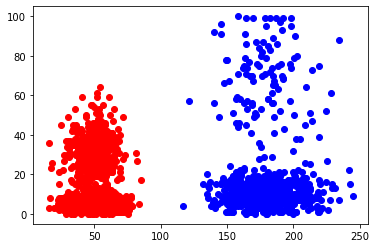

In [27]:
plt.plot(df[df["Labels"] == 0]["Distance_Feature"], df[df["Labels"]== 0]["Speeding_Feature"], "ro")
plt.plot(df[df["Labels"] == 1]["Distance_Feature"], df[df["Labels"] == 1]["Speeding_Feature"], "bo")

## [df["Labels"] == 0/1] - Так как у нас "Labels" раздлены на 1 и 0 (две группы данных по графику)

Обучим наши данные, но уже с четырьмя параметрами (вместо двух, как ранее)

In [31]:
kmeans = KMeans(n_clusters = 4).fit(df[["Distance_Feature","Speeding_Feature"]])

Еще раз создадим столбец "Labels" для новой обученной модели:

In [32]:
df["Labels"] = kmeans.labels_

In [ ]:
Посмотрим, что получилось:

In [34]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature,Labels
0,3423311935,71.24,28.0,3
1,3423313212,52.53,25.0,3
2,3423313724,64.54,27.0,3
3,3423311373,55.69,22.0,3
4,3423310999,54.58,25.0,3


Визуализируем данные на плоскости:

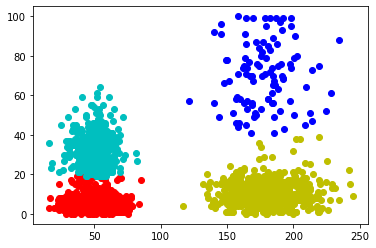

In [86]:
plt.plot(df[df["Labels"] == 0]["Distance_Feature"], df[df["Labels"] == 0]["Speeding_Feature"], "ro")
plt.plot(df[df["Labels"] == 1]["Distance_Feature"], df[df["Labels"] == 1]["Speeding_Feature"], "bo")
plt.plot(df[df["Labels"] == 2]["Distance_Feature"], df[df["Labels"] == 2]["Speeding_Feature"], "yo")
plt.plot(df[df["Labels"] == 3]["Distance_Feature"], df[df["Labels"] == 3]["Speeding_Feature"], "co")

#### Использование Elbow:

Создадим пустой массив значений функции потерь "losses" :

In [87]:
losses = []

Напишем цикл для нахождения elbow:

In [88]:
for i in range (1, 11):
    ## Сначала оубчим модель с i количеством групп:
    kmeans = KMeans(n_clusters=i).fit(df[['Distance_Feature', 'Speeding_Feature']])  
    ## Добавим в массив с результатами функции потерь с помощью встроенной в KMeans функции потерь .inetria_:
    inert = kmeans.inertia_ 
    losses.append(inert)

Посмотрим, что у нас получилось:

In [89]:
losses

[12184626.129627962,
 1316420.8509477214,
 992644.3397341794,
 719601.1096991908,
 534881.9730493034,
 372861.70375434676,
 319827.09685032186,
 277002.37703303766,
 252848.46276889683,
 230014.20642568628]

Визуализируем при помощи графика функцию потерь:

Text(0.5, 1.0, 'Elbow plot')

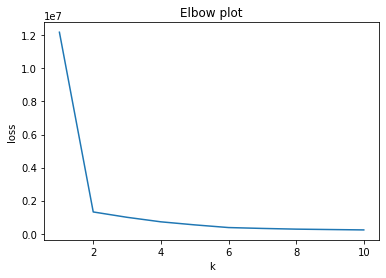

In [90]:
plt.plot(range(1, 11), losses)
plt.xlabel('k')
plt.ylabel('loss')
plt.title('Elbow plot')

#### Наилучшим вариантом, судя по графику, для групп (clusters) является 2